## 信用卡欺诈检测
基于信用卡交易记录数据，建立分类模型来预测哪些交易记录是异常的，哪些是正常的。

我整理好的数据地址：https://pan.baidu.com/s/18vPGelYCXGqp5OCWZWz36A 提取码：de0f

kaggle数据地址：https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

kesci数据地址：https://www.kesci.com/mw/dataset/5b56a592fc7e9000103c0442

### 任务目的：
完成数据集中正常交易数据和异常交易数据的分类，并对测试数据进行预测 0/1进行分类。

### 任务流程：
* 加载数据，观测问题
* 针对问题给出解决方案
* 数据集划分
* 评估方法对比
* 逻辑回归模型
* 建模结果分析
* 方案效果对比

### 主要解决问题：
  (1) 在此项目中，我们首先对数据进行观测，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案。
  (2) 这里我们提出了两种方法，下采样和过采样，两条路线来进行对比实验，任何时间问题来了之后，我们都不会一条路走到黑，没有对比就没有优化，通常会得到一个基础模型，然后对各种方法进行对比，找到最合适的，然后在任务开始之前，一定得多想多准备，得到的结果才有可选择的余地。
  (3) 在建模之前，需要对数据进行各种预处理操作，比如数据标准化，缺失值填充等，这些都是必要操作，由于数据本身已经给定了特征，此处我们还没有提到特征工程这个概念，后续实战中我们会逐步引入，其实数据预处理的工作是整个任务中最为重要也是最优难度的一个阶段，数据决定上限，模型逼近这个上限。
  (4) 先选好评估方法，再进行建模。建模的目的是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定要有一个合适的评估方法，比如通用的AUC、ROC、召回率、精确率等，也可以根据实际问题自己指定评估指标。
  (5) 选择合适的算法，这里我们使用的逻辑回归，逻辑回归现在使用的很少，但在金融领域还是一个非常具有代表的算法，其简单并具有可推导及解释性，深受金融行业的爱戴。
  (6) 模型调参也是非常重要的，不用的调参会导致不同的结果，后续实战中我们也会有更多的调参细节，对于调参可以参考工具包的API文档，了解每个参数的意义，再来选择合适的参数值。
  (7) 得到结果一定是和实际任务结合在一起，有时候线下（开发）时效果不错，但是上线后效果差距很大，所以测试环境也是必不可少的。

In [3]:
# 导入工具包
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 把图轻松的镶嵌到这个notebook中
%matplotlib inline

In [4]:
# 读取数据
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 数据情况说明：
数据集包含由欧洲人于2013年9月使用信用卡进行交易的数据。此数据集显示两天内发生的交易，其中284807笔交易中有492笔被盗刷。数据集非常不平衡，正例（被盗刷）占所有交易的0.172％。，这是因为由于保密问题，我们无法提供有关数据的原始功能和更多背景信息。特征V1，V2，... V28是使用PCA获得的主要组件，没有用PCA转换的唯一特征是“Class”和“Amount”。特征'Time'包含数据集中每个刷卡时间和第一次刷卡时间之间经过的秒数。特征'Class'是响应变量，如果发生被盗刷，则取值1，否则为0。

0    284315
1       492
Name: Class, dtype: int64


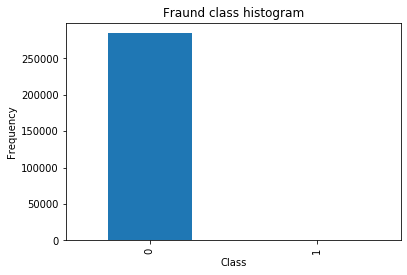

In [5]:
# 数据标签分布
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()  # 统计里面不同分类的量
count_classes.plot(kind='bar')  # 使用直方图
plt.title("Fraund class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
print(count_classes)

明显的正负样本数量有差异，正样本（为1）只有492个，负样本有28万个，这种情况下，如果直接给模型学习，那么模型很容易知道，只要它把样本预测为负，那么准确率就在99.99%以上。

我们不能让模型学到这种歪门技巧。

有两种方案解决：
* 1和0一样多，也就是1也有28万个左右。（上采样）
* 0和1一样少，也就是28万里只取492个。（下采样）

两个方案的比较：
* 第一种需要造一些数据，那么数据就是假的，假的会影响模型在预测真实数据时，结果自然会下降。
* 第二种方式则会减少真实数据，使得模型可学的数据变少，能力也会减弱。

### 数据标准化处理

上面Amount列的值还是原值，相比其它列的值过大，会导致模型结果出现偏差，认为Amount列是非常重要的，具体可参考前面讲过的回归分析章节，需要对其标准化，大的值在区间内依然是大的，小的值在区间内依然是小的，可以理解为一种缩放。

In [6]:
from sklearn.preprocessing import StandardScaler

# X = (x-μ)/σ,使得新的X数据集方差为1，均值为0
# fit_transform(data['Amount']) 意思是找出data['Amount']的μ和σ，并应用在data['Amount']上。
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis=1)  # Time这里用不上也去掉
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 下采样方案